In [1]:
import os
from google.colab import drive

drive.mount('/content/drive')
path = "/content/drive/My Drive/Datamining/TextMining/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [3]:
!cp "/content/drive/My Drive/Datamining/TextMining/Notebooks/functions.py" .
import functions as f
import importlib
importlib.reload(f)
f.v()

2020-05-30 14:50


In [4]:
import pandas as pd
import numpy as np
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize, sent_tokenize
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from keras.initializers import Constant
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using TensorFlow backend.


True

In [0]:
def plot_history(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [6]:
df = f.loadSampleDataSetFromSpread(gc, 'https://docs.google.com/spreadsheets/d/1mE-QcKMxy70Xt5OoVb8s0GqjS7jQiBD12WzxtmcNQck/edit#gid=1204809874');
df

,text,is_spam,is_news,sentiment
0,@FinanceExaminer @michaeltg @TheBubbleBubble I...,False,0.0,1.0
1,China Authorities Probe Alleged Illegal Bitcoi...,False,1.0,-1.0
2,ALERT: Bitcoin Cash (BCH) at Euro 380.81 incre...,False,1.0,1.0
3,Pretty cool concept. 👍 $CHR #crypto #cryptocu...,True,NaN,NaN
4,"Crypto Market Hits $200 Billion, Bitcoin Ralli...",True,NaN,NaN
...,...,...,...,...
974,@CNBC @CNBCMakeIt He says if you make 70K a ye...,False,0.0,1.0
975,https://t.co/U6p7FgOdd8 via @BitcoinEcho,False,0.0,0.0
976,The last time BTC closed above 12k for the wee...,False,0.0,1.0
977,https://t.co/o5jXwqEdbn is for #sale!#domain #...,True,NaN,NaN


In [7]:
df = df[df['is_spam'] == False]
df['is_news'] = df['is_news'].apply(lambda x: True if x == 1.0 else False)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,is_spam,is_news,sentiment
0,@FinanceExaminer @michaeltg @TheBubbleBubble I...,False,False,1.0
1,China Authorities Probe Alleged Illegal Bitcoi...,False,True,-1.0
2,ALERT: Bitcoin Cash (BCH) at Euro 380.81 incre...,False,True,1.0
5,Study Finds Most Ransomware Solutions Just Pay...,False,True,1.0
6,"Oh man that $6,400 resistance was really tough...",False,False,-1.0
...,...,...,...,...
972,@ThomasSchuIz Been doing both....luv it! Let m...,False,False,1.0
973,@girevik_ Which parameters for network effect ...,False,False,1.0
974,@CNBC @CNBCMakeIt He says if you make 70K a ye...,False,False,1.0
975,https://t.co/U6p7FgOdd8 via @BitcoinEcho,False,False,0.0


In [8]:
df_val = f.loadSampleDataSetFromSpread(gc, 'https://docs.google.com/spreadsheets/d/1G0sY49Ct5AU3OAV-kVU1SSJP9_-ci8N0aCvX00e2Gkg/edit#gid=2038236874')
df_val

,text,is_spam,is_news,sentiment
0,#BTC #Bitcoin to 7500$ and after this back to ...,False,0.0,1.0
1,@APompliano @McDonalds What is the cost of tra...,False,0.0,0.0
2,"Selling at 6,500USD. Bye Bitcoin Co. Ltd. htt...",False,0.0,-1.0
3,Lets play a game as we wait for Bakkt 10K BTC ...,False,0.0,1.0
4,@GoonAlerts_ Favorite coin @sentivate $SNTVT I...,False,0.0,1.0
...,...,...,...,...
393,@Crypto_Guy_UK you do understand China are inv...,False,0.0,-1.0
394,BTC/USD | $BTCUSD | $BTC $USD short Long or ...,True,NaN,NaN
395,#Blockchain #Crypto #Bitcoin #Ethereum #Tradin...,True,NaN,NaN
396,@CalvinAyre according to your mother bitcoin i...,False,0.0,1.0


In [9]:
df_val = df_val[df_val['is_spam'] == False]
df_val['is_news'] = df_val['is_news'].apply(lambda x: True if x == 1.0 else False)
df_val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,is_spam,is_news,sentiment
0,#BTC #Bitcoin to 7500$ and after this back to ...,False,False,1.0
1,@APompliano @McDonalds What is the cost of tra...,False,False,0.0
2,"Selling at 6,500USD. Bye Bitcoin Co. Ltd. htt...",False,False,-1.0
3,Lets play a game as we wait for Bakkt 10K BTC ...,False,False,1.0
4,@GoonAlerts_ Favorite coin @sentivate $SNTVT I...,False,False,1.0
...,...,...,...,...
391,PURA – Puration To Introduce New CBD Infused C...,False,False,0.0
392,##Bitcoin Showing Signs of Forming a Long-Term...,False,False,1.0
393,@Crypto_Guy_UK you do understand China are inv...,False,False,-1.0
396,@CalvinAyre according to your mother bitcoin i...,False,False,1.0


# Preparacion de datos para las RNN

In [0]:
x_dev_text = df['text'].apply(f.normalizeForTokenization)
y_dev = df['is_news']
x_test_text = df_val['text'].apply(f.normalizeForTokenization)
y_test = df_val['is_news']

In [0]:
vocab_size = 10000+1
embedding_dim = 300
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
validation_size = 0.2

# Seteamos max_length teniendo en cuenta el largo promedio de los tweets
max_length = 50

In [0]:
x_train_text, x_validation_text, y_train, y_validation = train_test_split(x_dev_text, y_dev, test_size = validation_size, random_state=1234)

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train_text)
x_train = tokenizer.texts_to_sequences(x_train_text)
x_validation = tokenizer.texts_to_sequences(x_validation_text)
x_test = tokenizer.texts_to_sequences(x_test_text)

In [0]:
x_train = pad_sequences(x_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)
x_validation = pad_sequences(x_validation, maxlen=max_length, padding=padding_type, truncating=trunc_type)
x_test = pad_sequences(x_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Naive Bayes

In [0]:
count_vect = CountVectorizer(tokenizer=word_tokenize, max_features=5000)
x_train_NB = count_vect.fit_transform(x_dev_text) # cuenta frecuencia de tokens y define el diccionario
x_validation_NB = count_vect.transform(x_test_text) # cuenta frecuencia de tokens existentes en el diccionario

clf = MultinomialNB(alpha=1) # alpha es el smoothing parameter
NB_model = clf.fit(x_train_NB, y_dev)
pred = NB_model.predict(x_validation_NB)

In [16]:
{
    'f1' : f1_score(y_test, pred),
    'accuracy': accuracy_score(y_test, pred),
    'recall': recall_score(y_test, pred)
}

{'accuracy': 0.796812749003984,
 'f1': 0.76056338028169,
 'recall': 0.7864077669902912}

In [17]:
tf.math.confusion_matrix(labels=y_test, predictions=pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[119,  29],
       [ 22,  81]], dtype=int32)>

Por las dudas pruebo NB validando contra "validación" (en lugar de test)

In [0]:
count_vect = CountVectorizer(tokenizer=word_tokenize, max_features=5000)
x_train_NB = count_vect.fit_transform(x_train_text) # cuenta frecuencia de tokens y define el diccionario
x_validation_NB = count_vect.transform(x_validation_text) # cuenta frecuencia de tokens existentes en el diccionario

clf = MultinomialNB(alpha=1) # alpha es el smoothing parameter
NB_model = clf.fit(x_train_NB, y_train)
pred = NB_model.predict(x_validation_NB)

In [19]:
{
    'f1' : f1_score(y_validation, pred),
    'accuracy': accuracy_score(y_validation, pred),
    'recall': recall_score(y_validation, pred)
}

{'accuracy': 0.8203125, 'f1': 0.7676767676767677, 'recall': 0.8260869565217391}

# RNN

In [20]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_gru.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 300)           3000300   
_________________________________________________________________
gru (GRU)                    (None, 128)               165120    
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 3,166,831
Trainable params: 3,166,831
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model_gru.fit(x_train, y_train, batch_size=100, epochs=15, validation_data=(x_validation, y_validation))

Epoch 1/15
6/6 [==============================] - 1s 104ms/step - loss: 0.6887 - accuracy: 0.6094 - val_loss: 0.6753 - val_accuracy: 0.6406
Epoch 2/15
6/6 [==============================] - 0s 33ms/step - loss: 0.6749 - accuracy: 0.6172 - val_loss: 0.6627 - val_accuracy: 0.6406
Epoch 3/15
6/6 [==============================] - 0s 37ms/step - loss: 0.6713 - accuracy: 0.6172 - val_loss: 0.6638 - val_accuracy: 0.6406
Epoch 4/15
6/6 [==============================] - 0s 33ms/step - loss: 0.6707 - accuracy: 0.6172 - val_loss: 0.6641 - val_accuracy: 0.6406
Epoch 5/15
6/6 [==============================] - 0s 34ms/step - loss: 0.6703 - accuracy: 0.6172 - val_loss: 0.6626 - val_accuracy: 0.6406
Epoch 6/15
6/6 [==============================] - 0s 33ms/step - loss: 0.6691 - accuracy: 0.6172 - val_loss: 0.6612 - val_accuracy: 0.6406
Epoch 7/15
6/6 [==============================] - 0s 34ms/step - loss: 0.6670 - accuracy: 0.6172 - val_loss: 0.6580 - val_accuracy: 0.6406
Epoch 8/15
6/6 [==========

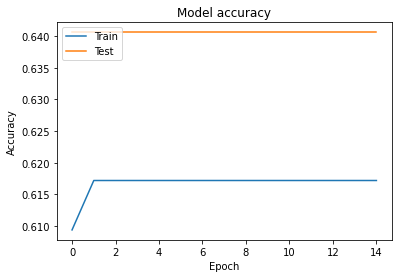

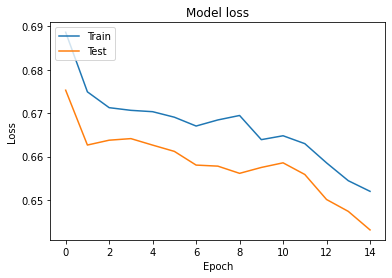

In [22]:
plot_history(history)

In [23]:
pred = model_gru.predict(x_test)
{
    'f1' : f1_score(y_test, pred[:,0] > 0.5),
    'accuracy': accuracy_score(y_test, pred[:,0] > 0.5),
    'recall': recall_score(y_test, pred[:,0] > 0.5)
}

{'accuracy': 0.5896414342629482, 'f1': 0.0, 'recall': 0.0}

In [24]:
tf.math.confusion_matrix(labels=y_test, predictions=(pred[:,0] > 0.5))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[148,   0],
       [103,   0]], dtype=int32)>

# RNN Bidireccional

In [25]:
model_bigru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences = True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_bigru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_bigru.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 300)           3000300   
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 256)           330240    
_________________________________________________________________
dropout (Dropout)            (None, 50, 256)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               296448    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [26]:
history = model_bigru.fit(x_train, y_train, batch_size=100, epochs=15, validation_data=(x_validation, y_validation))

Epoch 1/15
6/6 [==============================] - 1s 204ms/step - loss: 0.6738 - accuracy: 0.6133 - val_loss: 0.6233 - val_accuracy: 0.6406
Epoch 2/15
6/6 [==============================] - 0s 43ms/step - loss: 0.5912 - accuracy: 0.6230 - val_loss: 0.5435 - val_accuracy: 0.7188
Epoch 3/15
6/6 [==============================] - 0s 46ms/step - loss: 0.4564 - accuracy: 0.7930 - val_loss: 0.5105 - val_accuracy: 0.7891
Epoch 4/15
6/6 [==============================] - 0s 44ms/step - loss: 0.3476 - accuracy: 0.9277 - val_loss: 0.4940 - val_accuracy: 0.8438
Epoch 5/15
6/6 [==============================] - 0s 44ms/step - loss: 0.2458 - accuracy: 0.9512 - val_loss: 0.4920 - val_accuracy: 0.8203
Epoch 6/15
6/6 [==============================] - 0s 45ms/step - loss: 0.1303 - accuracy: 0.9707 - val_loss: 0.7949 - val_accuracy: 0.8203
Epoch 7/15
6/6 [==============================] - 0s 44ms/step - loss: 0.0451 - accuracy: 0.9941 - val_loss: 0.6573 - val_accuracy: 0.8125
Epoch 8/15
6/6 [==========

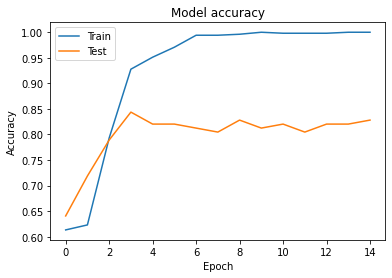

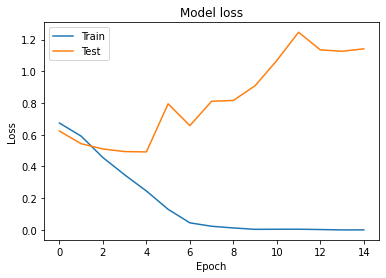

In [27]:
plot_history(history)

In [28]:
pred = model_bigru.predict(x_test)
{
    'f1' : f1_score(y_test, pred[:,0] > 0.5),
    'accuracy': accuracy_score(y_test, pred[:,0] > 0.5),
    'recall': recall_score(y_test, pred[:,0] > 0.5)
}

{'accuracy': 0.8127490039840638,
 'f1': 0.7772511848341233,
 'recall': 0.7961165048543689}

In [29]:
tf.math.confusion_matrix(labels=y_test, predictions=(pred[:,0] > 0.5))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[122,  26],
       [ 21,  82]], dtype=int32)>

# Embedding preentrenado

In [30]:
!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

#load model
w2v_model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    if i < vocab_size and word in w2v_model:
        embedding_matrix[i] = w2v_model[word]

--2020-05-30 21:18:20--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.2.51
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.2.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz.3’

GoogleNews-vectors- 100%[===================>]   1.53G  36.6MB/s    in 44s     

2020-05-30 21:19:05 (35.7 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz.3’ saved [1647046227/1647046227]



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# RNN con embedding preentrenado

In [31]:
model_gru_pre = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, embeddings_initializer=Constant(embedding_matrix), trainable=True),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_gru_pre.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_gru_pre.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 300)           3000300   
_________________________________________________________________
gru_3 (GRU)                  (None, 128)               165120    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 3,166,831
Trainable params: 3,166,831
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model_gru_pre.fit(x_train, y_train, batch_size=100, epochs=15, validation_data=(x_validation, y_validation))

Epoch 1/15
6/6 [==============================] - 1s 93ms/step - loss: 0.6908 - accuracy: 0.5957 - val_loss: 0.6827 - val_accuracy: 0.6406
Epoch 2/15
6/6 [==============================] - 0s 32ms/step - loss: 0.6797 - accuracy: 0.6172 - val_loss: 0.6671 - val_accuracy: 0.6406
Epoch 3/15
6/6 [==============================] - 0s 33ms/step - loss: 0.6660 - accuracy: 0.6172 - val_loss: 0.6489 - val_accuracy: 0.6406
Epoch 4/15
6/6 [==============================] - 0s 36ms/step - loss: 0.6529 - accuracy: 0.6172 - val_loss: 0.6461 - val_accuracy: 0.6406
Epoch 5/15
6/6 [==============================] - 0s 32ms/step - loss: 0.6522 - accuracy: 0.6172 - val_loss: 0.6420 - val_accuracy: 0.6406
Epoch 6/15
6/6 [==============================] - 0s 32ms/step - loss: 0.6362 - accuracy: 0.6191 - val_loss: 0.6456 - val_accuracy: 0.6406
Epoch 7/15
6/6 [==============================] - 0s 33ms/step - loss: 0.6289 - accuracy: 0.6191 - val_loss: 0.6417 - val_accuracy: 0.6406
Epoch 8/15
6/6 [===========

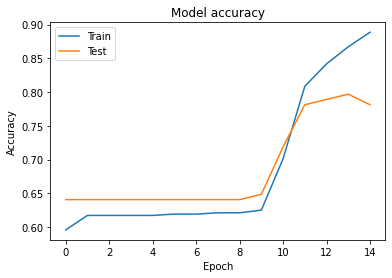

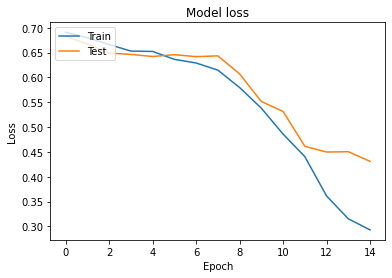

In [33]:
plot_history(history)

In [34]:
pred = model_gru_pre.predict(x_test)
pred = pred[:,0] > 0.5
{
    'f1' : f1_score(y_test, pred),
    'accuracy': accuracy_score(y_test, pred),
    'recall': recall_score(y_test, pred)
}

{'accuracy': 0.796812749003984,
 'f1': 0.7792207792207791,
 'recall': 0.8737864077669902}

In [35]:
tf.math.confusion_matrix(labels=y_test, predictions=pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[110,  38],
       [ 13,  90]], dtype=int32)>

In [0]:
# Dejo comentado el código para guardar y cargar
#modelFileName = 'gru_pre_2020-05-30_1355'
#modelFullPath = path + 'Modelos/' + modelFileName
#model_gru_pre.save(modelFullPath)
#new_model = tf.keras.models.load_model(modelFullPath)
#new_model.summary()

# RNN Bidireccional con embedding preentrenado

In [37]:
model_bigru_pre = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, embeddings_initializer=Constant(embedding_matrix), trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences = True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_bigru_pre.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_bigru_pre.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 300)           3000300   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 256)           330240    
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 256)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               296448    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [38]:
history = model_bigru_pre.fit(x_train, y_train, batch_size=100, epochs=15, validation_data=(x_validation, y_validation))

Epoch 1/15
6/6 [==============================] - 1s 206ms/step - loss: 0.6690 - accuracy: 0.5762 - val_loss: 0.6020 - val_accuracy: 0.6406
Epoch 2/15
6/6 [==============================] - 0s 46ms/step - loss: 0.5683 - accuracy: 0.6504 - val_loss: 0.5348 - val_accuracy: 0.7734
Epoch 3/15
6/6 [==============================] - 0s 43ms/step - loss: 0.4841 - accuracy: 0.8027 - val_loss: 0.5040 - val_accuracy: 0.7969
Epoch 4/15
6/6 [==============================] - 0s 45ms/step - loss: 0.3991 - accuracy: 0.8438 - val_loss: 0.4809 - val_accuracy: 0.7812
Epoch 5/15
6/6 [==============================] - 0s 43ms/step - loss: 0.3399 - accuracy: 0.8574 - val_loss: 0.5089 - val_accuracy: 0.8125
Epoch 6/15
6/6 [==============================] - 0s 44ms/step - loss: 0.3020 - accuracy: 0.8730 - val_loss: 0.4218 - val_accuracy: 0.8047
Epoch 7/15
6/6 [==============================] - 0s 44ms/step - loss: 0.2073 - accuracy: 0.9238 - val_loss: 0.4845 - val_accuracy: 0.7969
Epoch 8/15
6/6 [==========

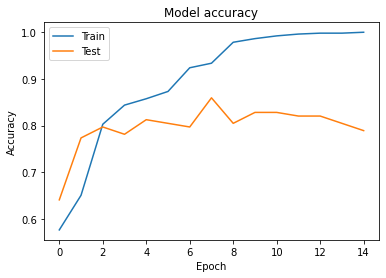

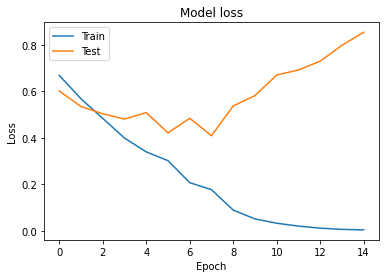

In [39]:
plot_history(history)

In [40]:
pred = model_bigru_pre.predict(x_test)
{
    'f1' : f1_score(y_test, pred[:,0] > 0.5),
    'accuracy': accuracy_score(y_test, pred[:,0] > 0.5),
    'recall': recall_score(y_test, pred[:,0] > 0.5)
}

{'accuracy': 0.8087649402390438,
 'f1': 0.7575757575757577,
 'recall': 0.7281553398058253}

In [41]:
tf.math.confusion_matrix(labels=y_test, predictions=(pred[:,0] > 0.5))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[128,  20],
       [ 28,  75]], dtype=int32)>

In [0]:
# Guardo el modelo que dio mejor hasta ahora
modelFileName = 'news_model_bigru_pre_2020-05-30_1811'
modelFullPath = path + 'Modelos/' + modelFileName
#model_bigru_pre.save(modelFullPath)
#new_model = tf.keras.models.load_model(modelFullPath)
#new_model.summary()